In [1]:
# import libraries/packages 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import DataFrames

%store -r listing_property


In [3]:
listing_property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14741 entries, 0 to 16413
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14741 non-null  object 
 1   name                    14719 non-null  object 
 2   description             14487 non-null  object 
 3   neighborhood_overview   7915 non-null   object 
 4   neighborhood            14741 non-null  object 
 5   latitude                14741 non-null  float64
 6   longitude               14741 non-null  float64
 7   property_type           14741 non-null  object 
 8   room_type               14741 non-null  object 
 9   accommodates            14741 non-null  int64  
 10  bathrooms_text          14741 non-null  object 
 11  share_bath              14741 non-null  object 
 12  bedrooms                14741 non-null  float64
 13  beds                    14741 non-null  float64
 14  amenities               14741 non-null

<AxesSubplot:xlabel='price'>

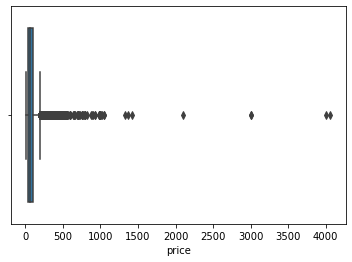

In [4]:
# to check extreme price 
sns.boxplot(x= listing_property['price'])


In [9]:

listing_property.price.agg(['mean','median','max','min'])

mean        86.029713
median      60.000000
max       4060.000000
min          8.000000
Name: price, dtype: float64

In [10]:
# check the price at 95th percentile
np.percentile(listing_property['price'], 95)

230.0

In [5]:
# take out 5% the highest price 
listing_property_t = listing_property.query('price <= 230')

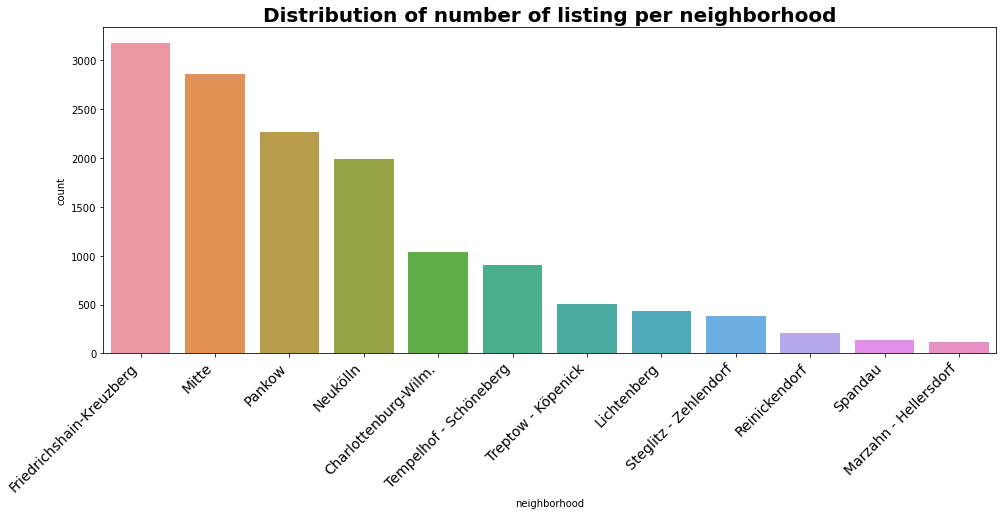

In [12]:
# plotting distribution 

# neighborhood 

neighborhood = listing_property_t.neighborhood.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'neighborhood', data= listing_property_t, order= listing_property_t['neighborhood'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right', fontsize= 14)

plt.title('Distribution of number of listing per neighborhood', fontsize= 20, fontweight= 'bold')
plt.show()
 

<AxesSubplot:xlabel='neighborhood'>

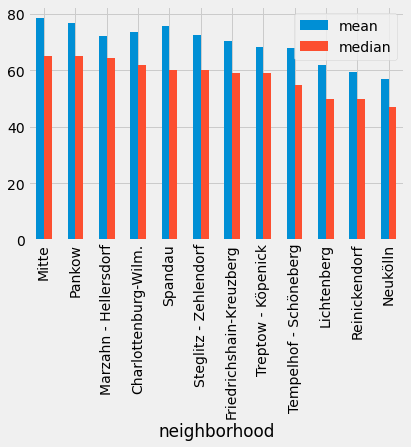

In [13]:
# compare mean and median across neighborhood 

plt.style.use("fivethirtyeight")

listing_property_t.groupby('neighborhood').price.agg(['mean','median']).sort_values(by= 'median', ascending= False).plot(kind= 'bar')

[Text(0, 0, 'Friedrichshain-Kreuzberg'),
 Text(1, 0, 'Mitte'),
 Text(2, 0, 'Tempelhof - Schöneberg'),
 Text(3, 0, 'Pankow'),
 Text(4, 0, 'Treptow - Köpenick'),
 Text(5, 0, 'Marzahn - Hellersdorf'),
 Text(6, 0, 'Charlottenburg-Wilm.'),
 Text(7, 0, 'Neukölln'),
 Text(8, 0, 'Steglitz - Zehlendorf'),
 Text(9, 0, 'Lichtenberg'),
 Text(10, 0, 'Spandau'),
 Text(11, 0, 'Reinickendorf')]

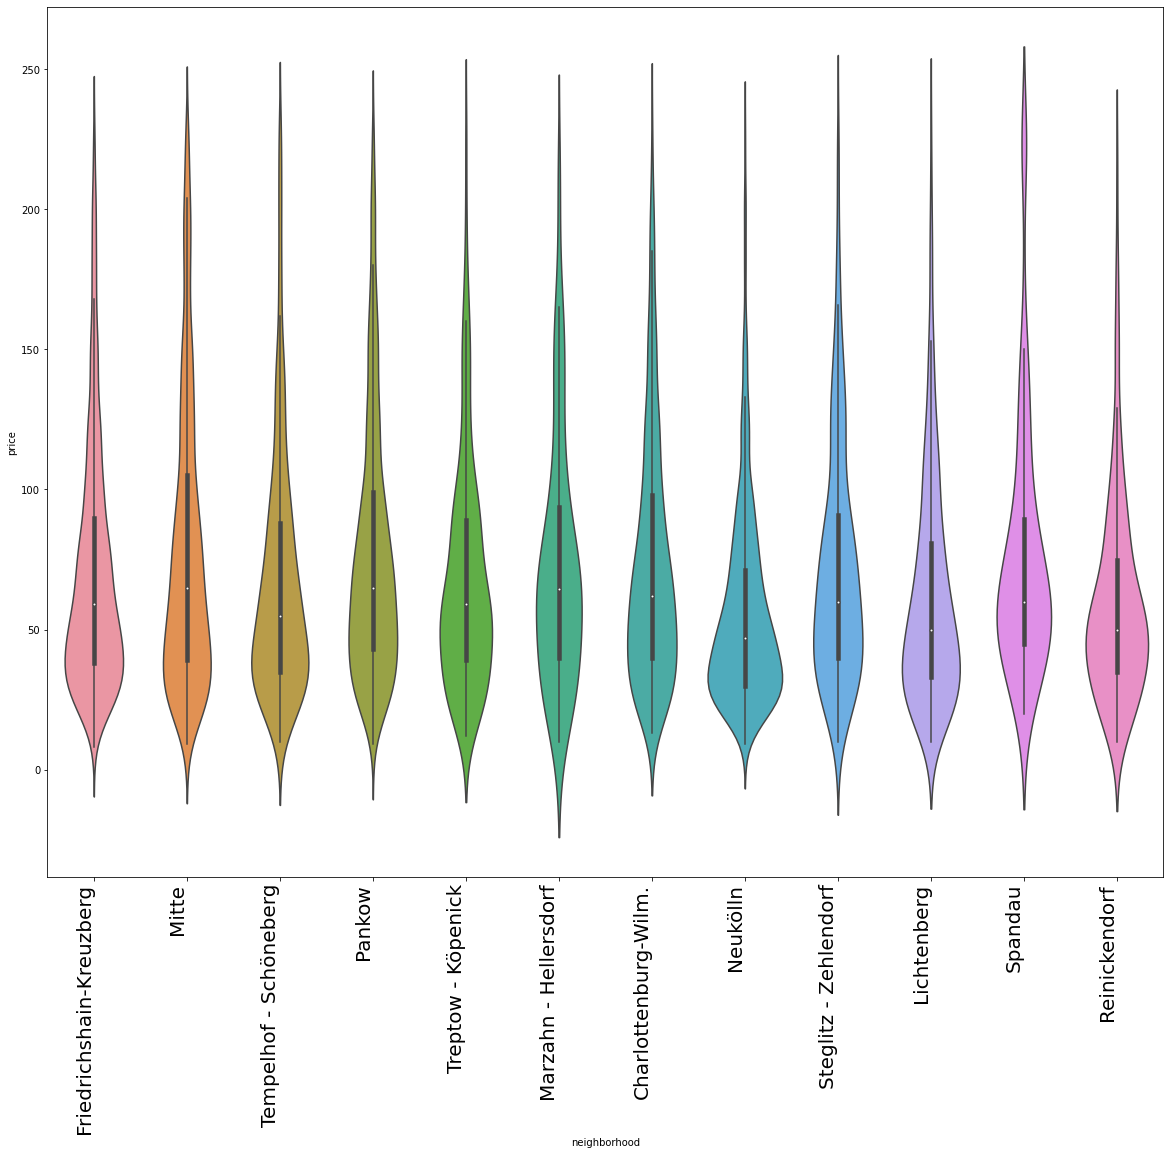

In [6]:
# violin plot for neighborhood 
plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'neighborhood', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha= 'right', fontsize= 20)

In [7]:
listing_property_t.pivot_table(values= 'price',
                                index= 'neighborhood',
                                aggfunc= ('count','mean','min','max', 'median')).sort_values(by='median', ascending= False)

,count,max,mean,median,min
neighborhood,,,,,
Mitte,2852,230.0,78.781557,65.0,9.0
Pankow,2263,230.0,76.971277,65.0,9.0
Marzahn - Hellersdorf,118,214.0,72.279661,64.5,10.0
Charlottenburg-Wilm.,1038,230.0,73.615607,62.0,13.0
Spandau,135,224.0,75.681481,60.0,20.0
Steglitz - Zehlendorf,384,229.0,72.653646,60.0,10.0
Friedrichshain-Kreuzberg,3176,230.0,70.526763,59.0,8.0
Treptow - Köpenick,504,230.0,68.164683,59.0,12.0
Tempelhof - Schöneberg,903,230.0,67.912514,55.0,10.0


In [17]:
listing_property_t.groupby('neighborhood').price.agg(['count','mean','median','max','min']).sort_values(by='median', ascending= False)

,count,mean,median,max,min
neighborhood,,,,,
Mitte,2852,78.781557,65.0,230.0,9.0
Pankow,2263,76.971277,65.0,230.0,9.0
Marzahn - Hellersdorf,118,72.279661,64.5,214.0,10.0
Charlottenburg-Wilm.,1038,73.615607,62.0,230.0,13.0
Spandau,135,75.681481,60.0,224.0,20.0
Steglitz - Zehlendorf,384,72.653646,60.0,229.0,10.0
Friedrichshain-Kreuzberg,3176,70.526763,59.0,230.0,8.0
Treptow - Köpenick,504,68.164683,59.0,230.0,12.0
Tempelhof - Schöneberg,903,67.912514,55.0,230.0,10.0


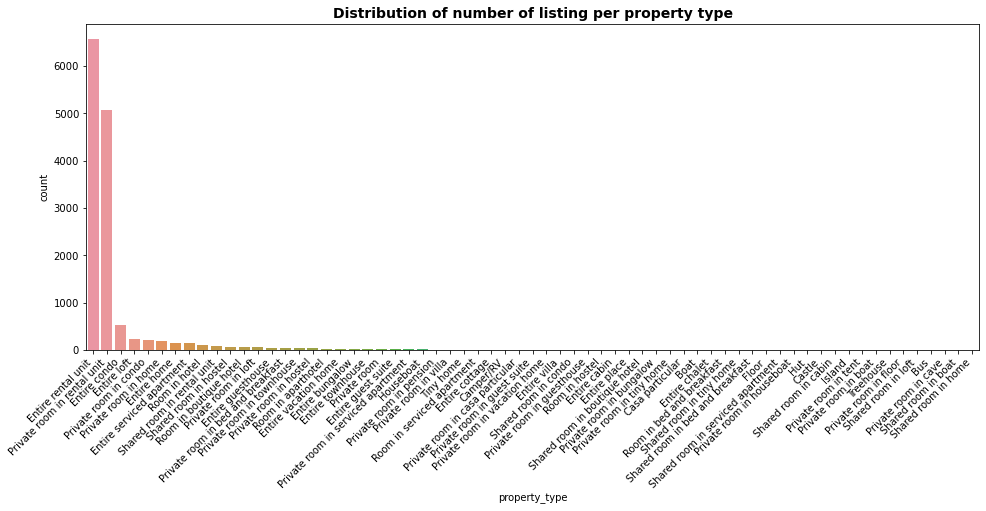

In [8]:
# property type (nunique: 65)

property_type = listing_property_t.property_type.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'property_type', data= listing_property_t, order= listing_property_t['property_type'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per property type', fontsize= 14, fontweight= 'bold')
plt.show()

In [9]:
# find out top 10 most common property types 
sum(listing_property_t['property_type'].value_counts().nlargest(10))/listing_property_t['id'].count()

0.9490182077829347

In [10]:
listing_property_t['property_type'].value_counts().nlargest(10)

Entire rental unit             6558
Private room in rental unit    5058
Entire condo                    535
Entire loft                     228
Private room in condo           210
Private room in home            195
Entire home                     152
Entire serviced apartment       150
Room in hotel                   117
Shared room in rental unit       88
Name: property_type, dtype: int64

In [39]:
# filter out the rest  

filt_ = listing_property_t['property_type'].isin(['Entire rental unit', 'Private room in rental unit', 'Entire condo', 'Entire serviced apartment', 'Entire loft','Private room in condo','Private room in home','Entire home','Room in hotel','Shared room in rental unit'])
top_10_property = listing_property_t[filt_]

top_10_property['property_type'].value_counts()

Entire rental unit             6558
Private room in rental unit    5058
Entire condo                    535
Entire loft                     228
Private room in condo           210
Private room in home            195
Entire home                     152
Entire serviced apartment       150
Room in hotel                   117
Shared room in rental unit       88
Name: property_type, dtype: int64

In [12]:
# pivot table for price vs. property type 
top_10_property.pivot_table(values= 'price',
                                index= 'property_type',
                                aggfunc= ('count','mean','median','max')).sort_values(by='median', ascending= False).head(10)


,count,max,mean,median
property_type,,,,
Entire serviced apartment,150,230.0,148.453333,145.0
Room in hotel,117,229.0,132.410256,130.0
Entire loft,228,230.0,118.407895,109.5
Entire home,152,223.0,107.763158,96.0
Entire condo,535,230.0,104.155140,95.0
Entire rental unit,6558,230.0,85.752211,75.0
Private room in condo,210,179.0,48.809524,40.0
Private room in home,195,195.0,42.923077,40.0
Private room in rental unit,5058,207.0,41.014037,35.0


<AxesSubplot:xlabel='property_type'>

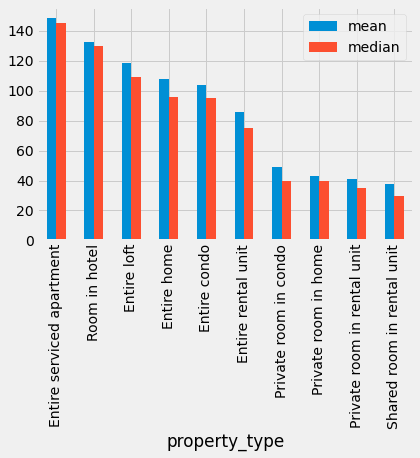

In [13]:
# compare mean and median across property types
plt.style.use("fivethirtyeight")
top_10_property.groupby('property_type').price.agg(['mean','median']).sort_values(by='median', ascending= False).plot(kind= 'bar')

[Text(0, 0, 'Entire rental unit'),
 Text(1, 0, 'Private room in condo'),
 Text(2, 0, 'Private room in rental unit'),
 Text(3, 0, 'Entire condo'),
 Text(4, 0, 'Shared room in rental unit'),
 Text(5, 0, 'Entire loft'),
 Text(6, 0, 'Entire serviced apartment'),
 Text(7, 0, 'Room in hotel'),
 Text(8, 0, 'Private room in home'),
 Text(9, 0, 'Entire home')]

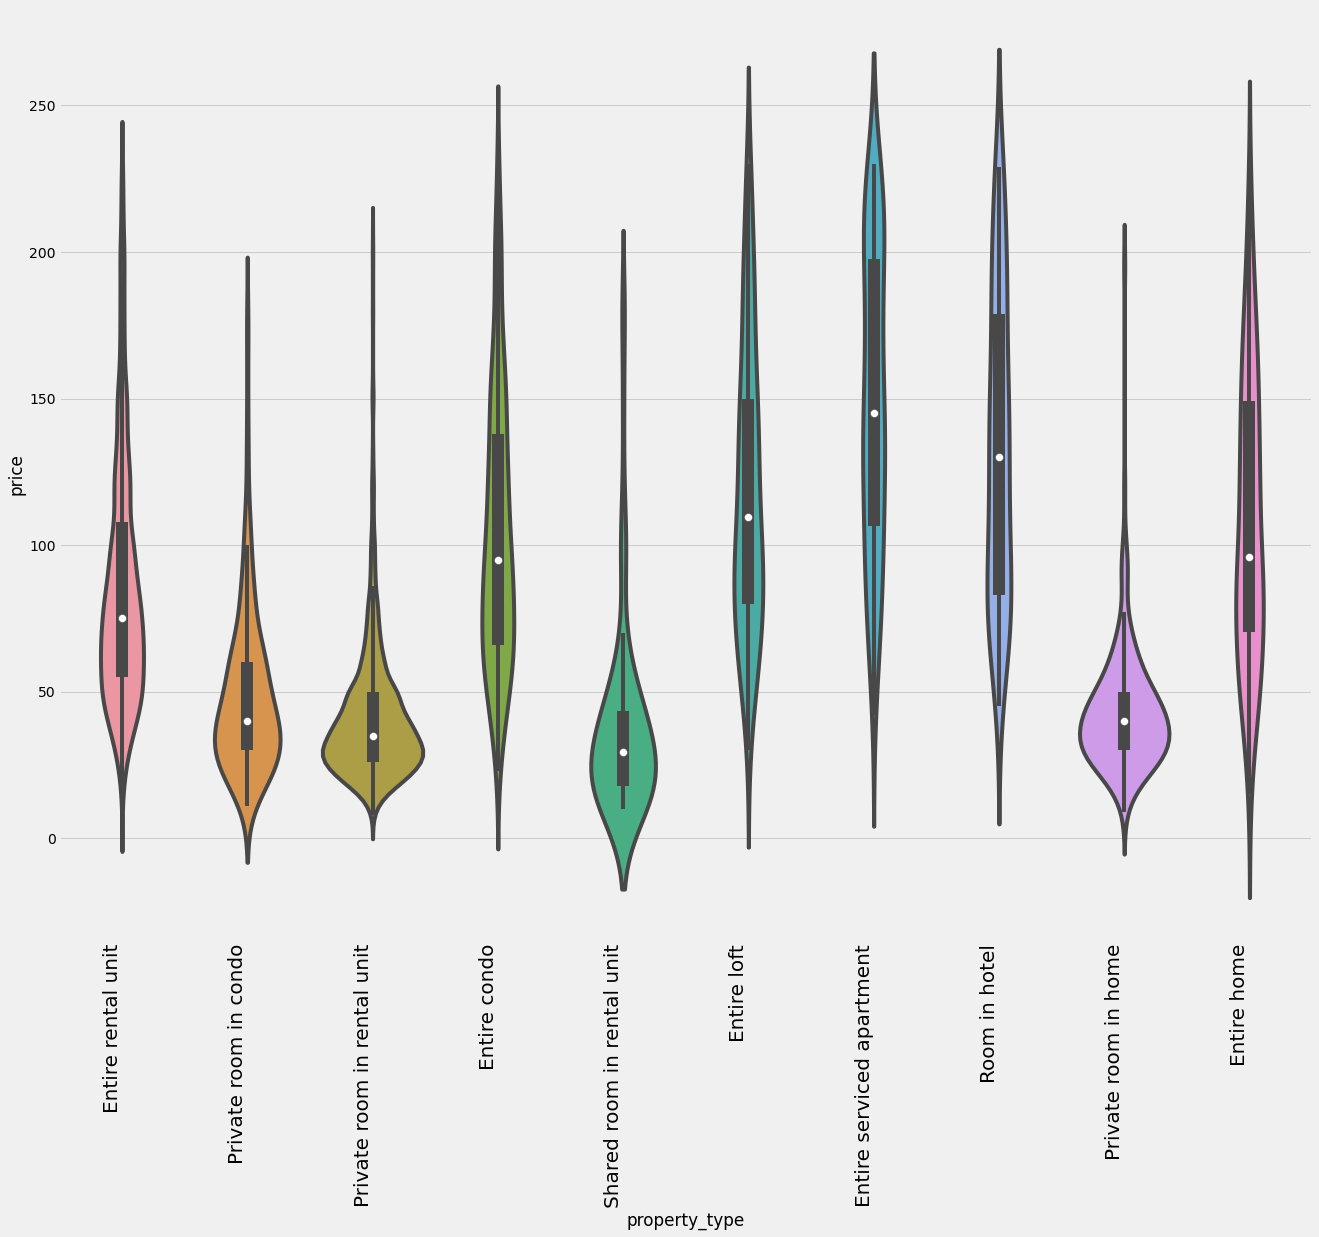

In [14]:
# violin plot - property type

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= top_10_property, x= 'property_type', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha= 'right', fontsize= 20)


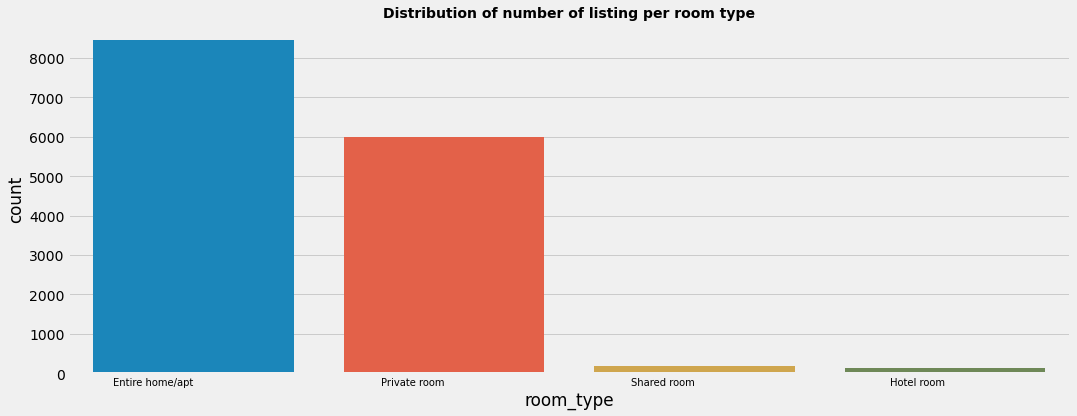

In [15]:
# room type

room_type = listing_property.room_type.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'room_type', data= listing_property, order=room_type)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 0, ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per room type', fontsize= 14, fontweight= 'bold')
plt.show()

In [16]:
listing_property_t.groupby('room_type').price.agg(['count','mean','median','max','min']).sort_values(by='median', ascending= False)

,count,mean,median,max,min
room_type,,,,,
Hotel room,54,158.925926,160.0,230.0,60.0
Entire home/apt,7864,90.028611,80.0,230.0,10.0
Private room,5912,45.431664,37.0,229.0,8.0
Shared room,175,50.337143,37.0,213.0,10.0


<AxesSubplot:xlabel='room_type'>

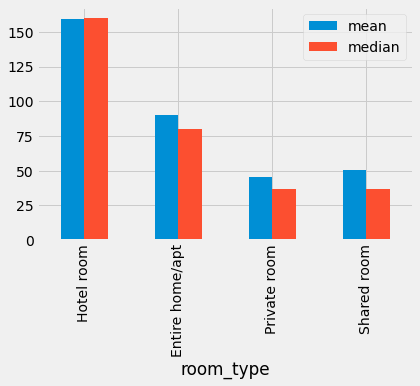

In [17]:
# compare mean and median
plt.style.use("fivethirtyeight")
listing_property_t.groupby('room_type').price.agg(['mean','median']).sort_values(by= 'median', ascending= False).plot(kind= 'bar')

[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room'),
 Text(3, 0, 'Hotel room')]

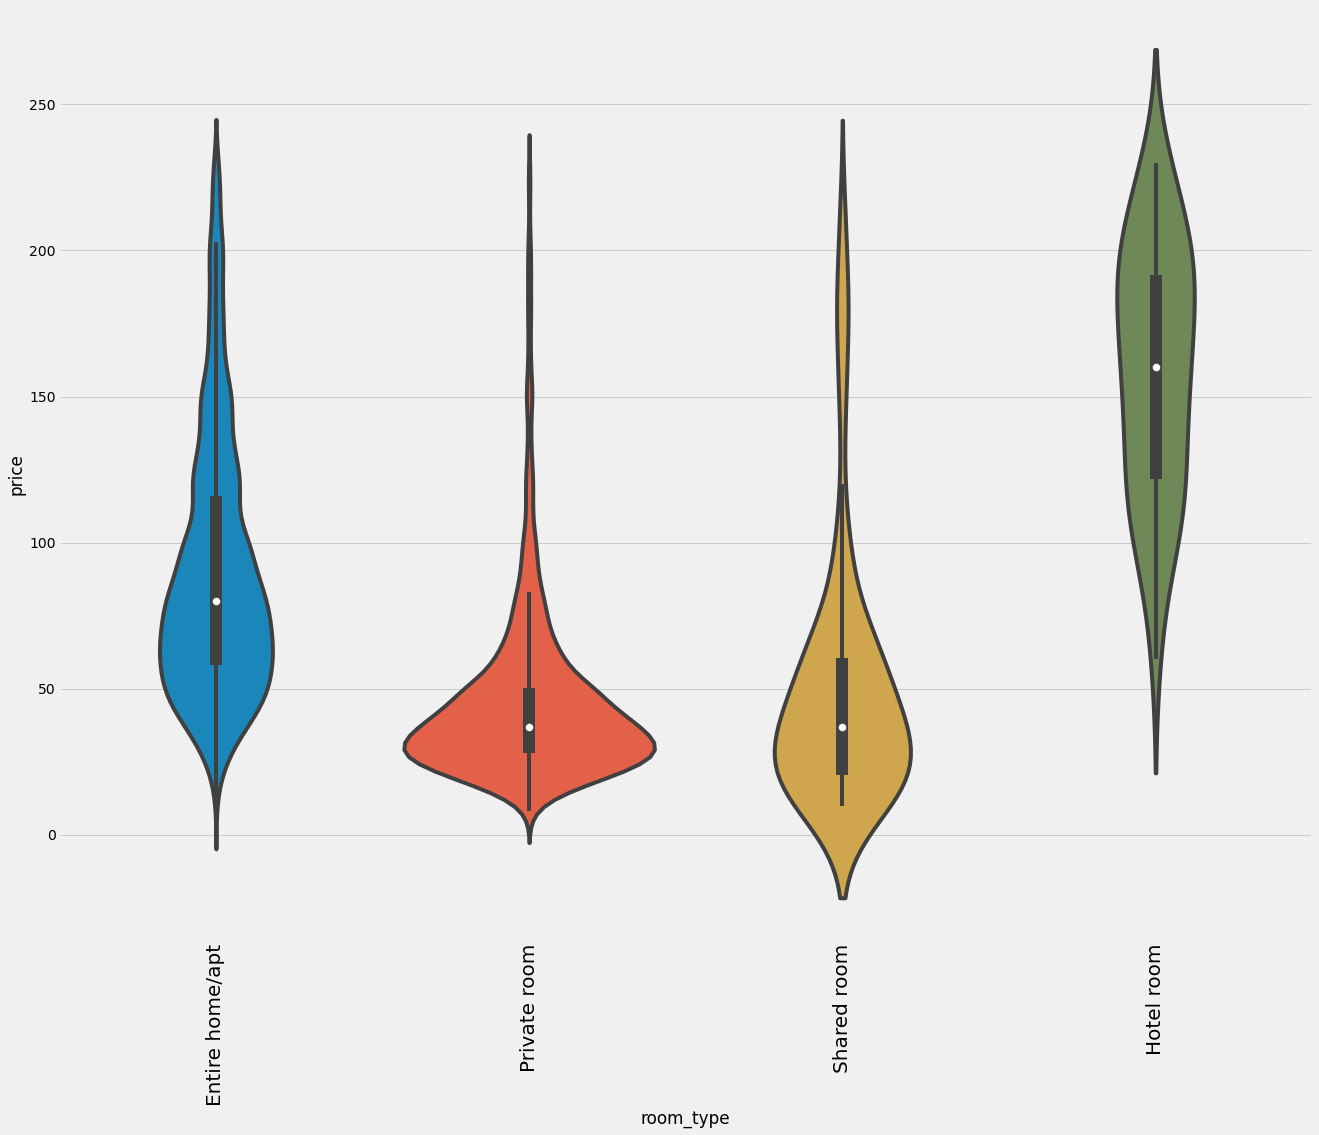

In [18]:
# violin plot - room type

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'room_type', y='price')

ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, fontsize= 20)

Text(0.5, 1.0, 'Distribution of number of listing per bath room type')

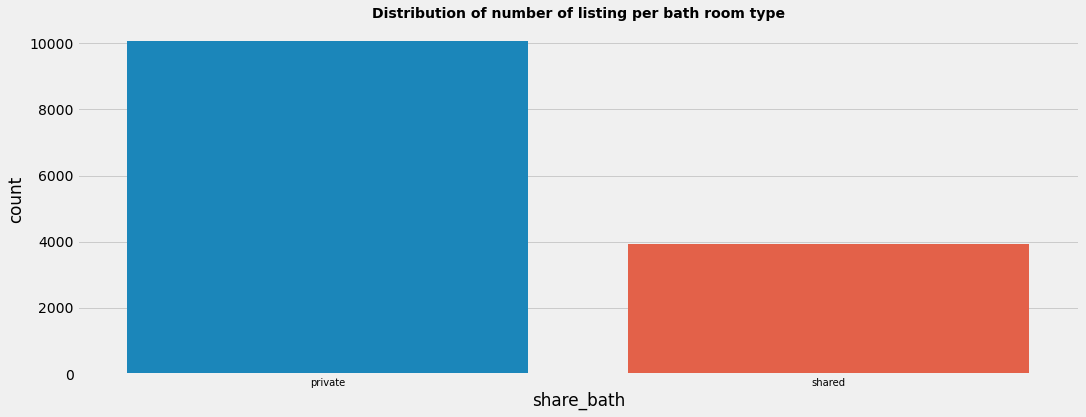

In [19]:
# shared bath 

shared_bath = ['private', 'shared']

plt.figure(figsize= (16,6))
ax = sns.countplot(x= 'share_bath', data= listing_property_t)
ax.set_xticklabels(shared_bath, fontsize= 10)

plt.title('Distribution of number of listing per bath room type', fontsize= 14, fontweight= 'bold')


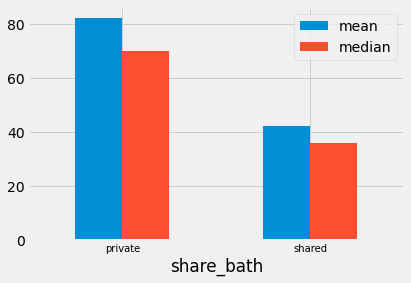

In [23]:
# compare mean and medians
plt.style.use("fivethirtyeight")
ax = listing_property_t.groupby('share_bath').price.agg(['mean','median']).plot(kind='bar')
ax.set_xticklabels(shared_bath, rotation= 0, fontsize= 10);


In [24]:
listing_property_t.groupby('share_bath').price.agg(['count','mean','median','min','max'])

,count,mean,median,min,max
share_bath,,,,,
0,10077,82.132976,70.0,8.0,230.0
1,3928,42.340631,36.0,10.0,229.0


[Text(0, 0, 'private'), Text(1, 0, 'shared')]

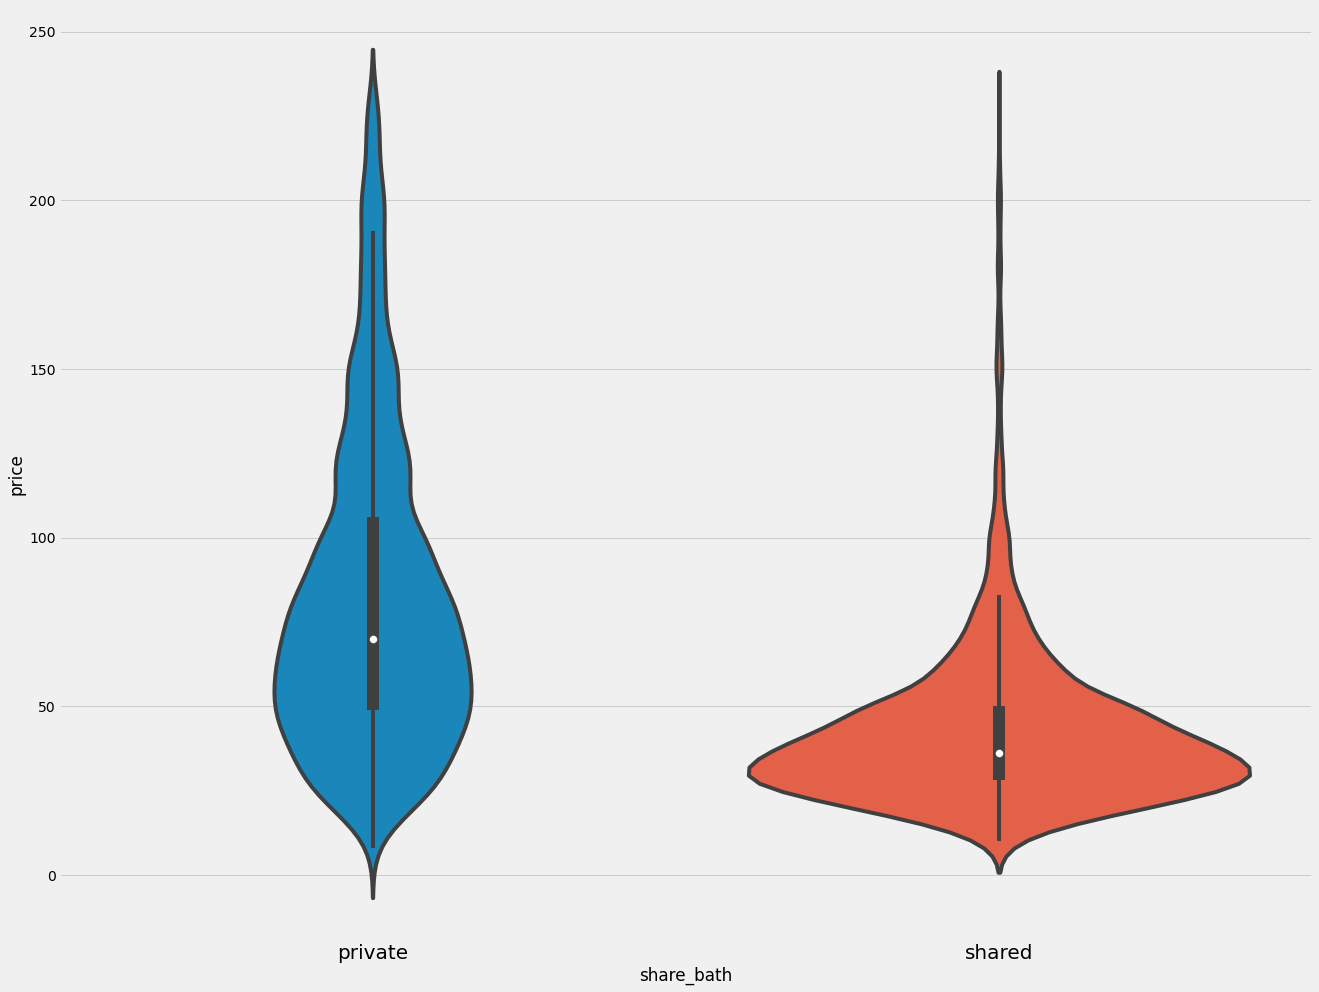

In [25]:
# violin plot - share_bath

plt.figure(figsize= (20,16))
ax = sns.violinplot(data= listing_property_t, x= 'share_bath', y='price')

ax.set_xticklabels(shared_bath, fontsize= 20)

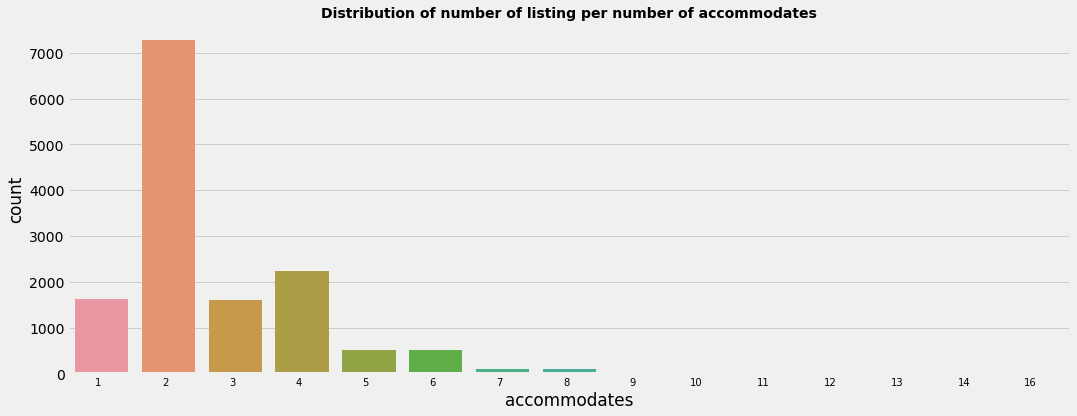

In [27]:
# accommodates 

accommodates = listing_property_t.accommodates.unique()

plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'accommodates', data= listing_property_t)

ax.set_xticklabels(ax.get_xticklabels(),ha= 'right', fontsize= 10)

plt.title('Distribution of number of listing per number of accommodates', fontsize= 14, fontweight= 'bold')
plt.show()


In [28]:
listing_property_t.groupby('accommodates').price.agg(['count','mean','median','min','max'])

,count,mean,median,min,max
accommodates,,,,,
1,1631,39.638872,33.0,10.0,227.0
2,7278,59.612668,50.0,8.0,230.0
3,1603,75.677480,66.0,9.0,230.0
4,2226,95.153190,86.0,9.0,230.0
5,504,115.690476,112.0,20.0,230.0
6,507,127.394477,125.0,20.0,230.0
7,88,153.204545,150.5,12.0,230.0
8,104,152.500000,158.0,23.0,230.0
9,25,149.320000,150.0,25.0,218.0


<AxesSubplot:xlabel='accommodates'>

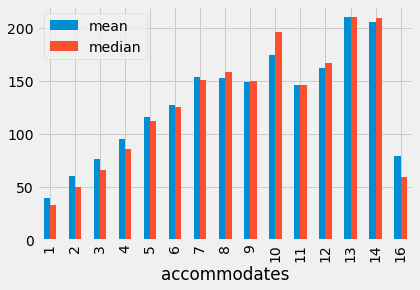

In [29]:
# compare mean and median based on numbers of accommodates 
plt.style.use("fivethirtyeight")
listing_property_t.groupby('accommodates').price.agg(['mean','median']).plot(kind= 'bar')

<AxesSubplot:xlabel='accommodates', ylabel='price'>

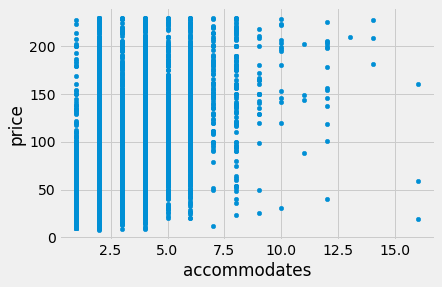

In [30]:
listing_property_t.plot.scatter(x='accommodates', y= 'price')

<AxesSubplot:xlabel='accommodates', ylabel='price'>

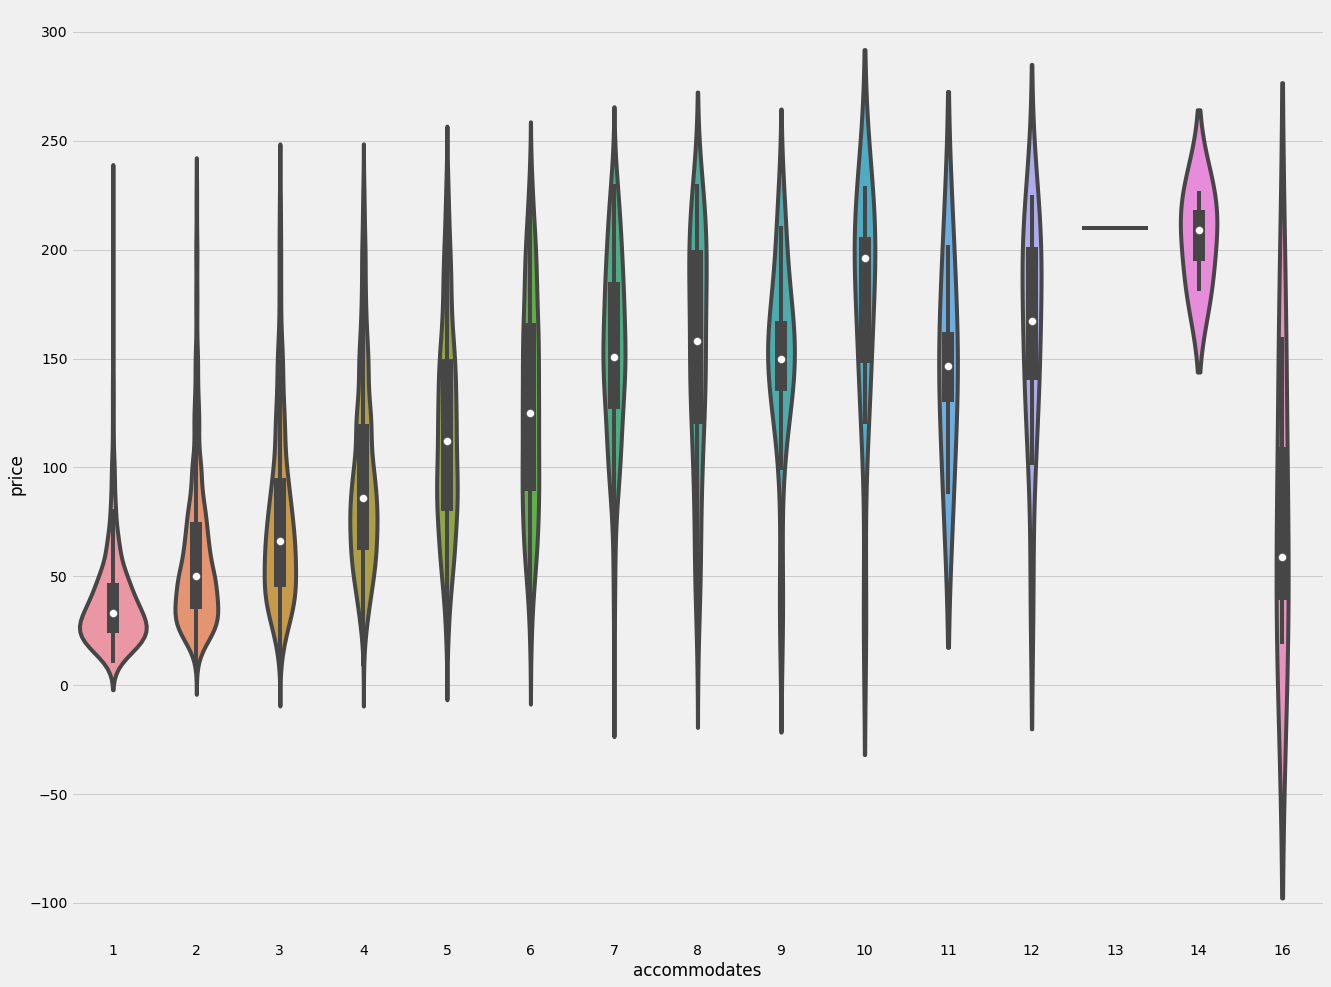

In [31]:
# violin plot - accommodates

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'accommodates', y='price')

<AxesSubplot:xlabel='bedrooms'>

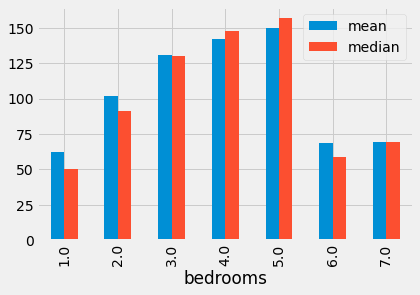

In [32]:
# number of bedrooms
plt.style.use("fivethirtyeight")
listing_property_t.groupby('bedrooms').price.agg(['mean','median']).plot(kind='bar')

Text(0.5, 1.0, 'Distribution of number of listing per number of bedrooms')

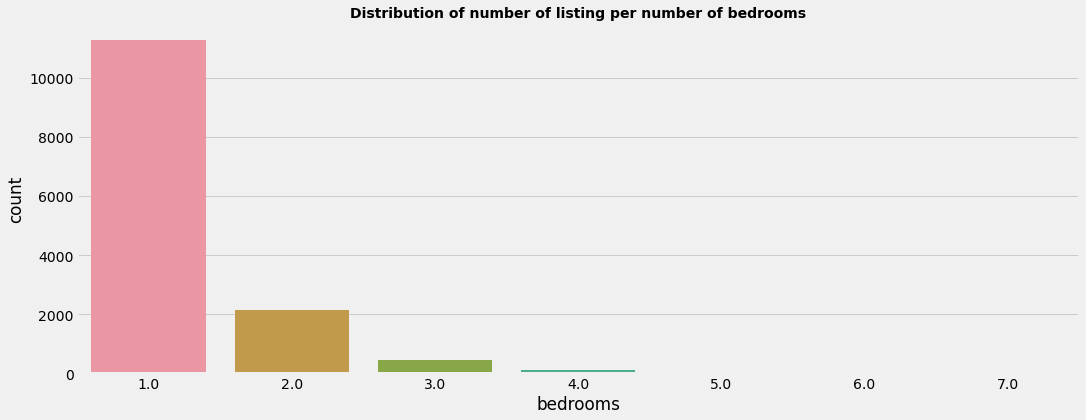

In [34]:
plt.figure(figsize= (16,6))
sns.countplot(x='bedrooms', data= listing_property_t)

plt.title('Distribution of number of listing per number of bedrooms', fontsize= 14, fontweight= 'bold')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

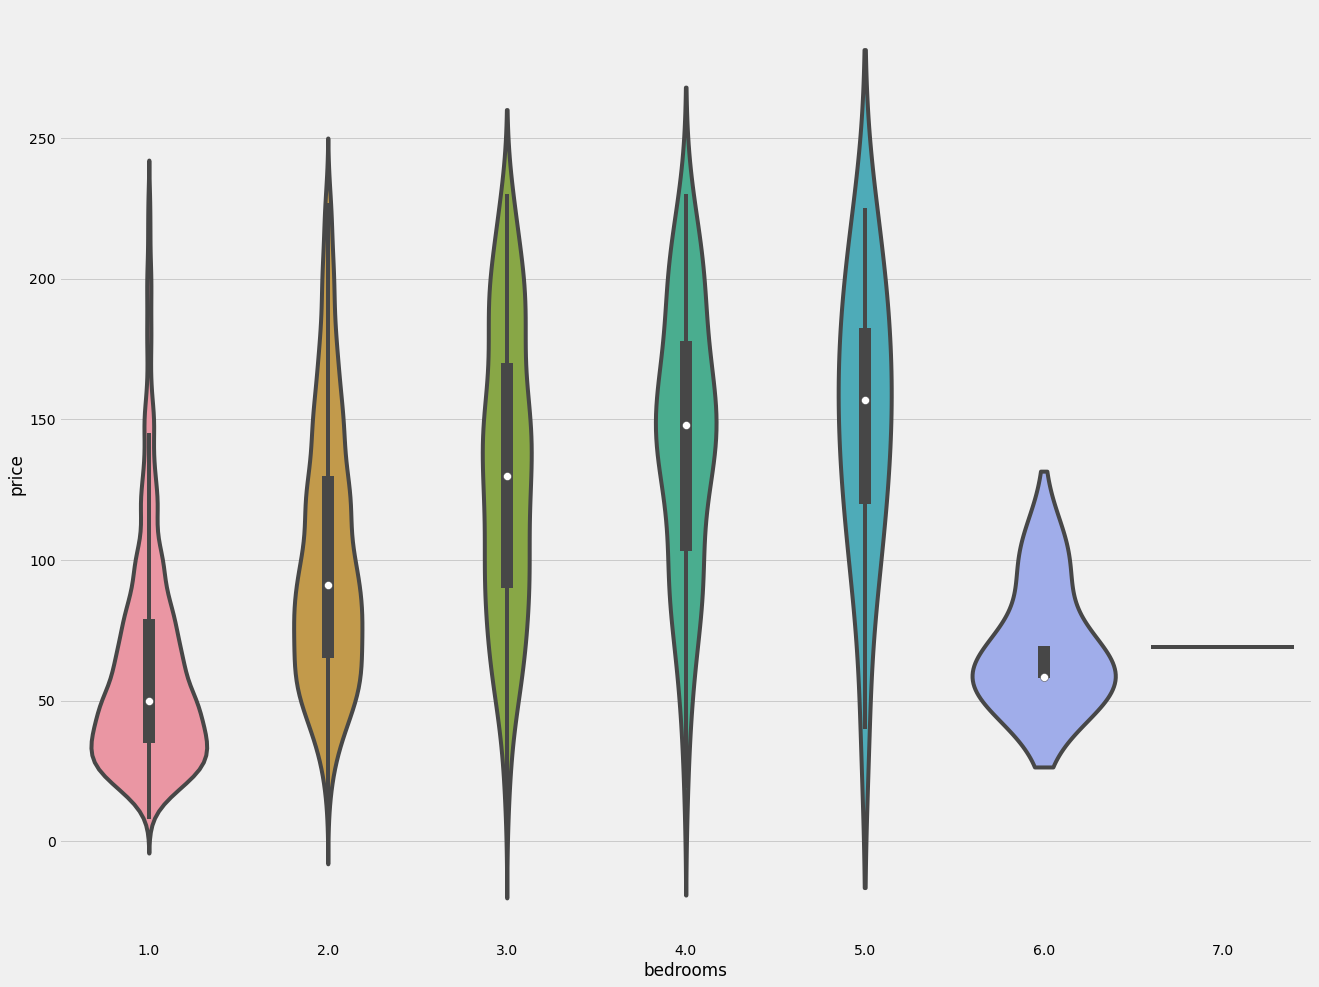

In [35]:
# violin plot - bedrooms

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'bedrooms', y='price')

Text(0.5, 1.0, 'Distribution of number of listing per number of beds')

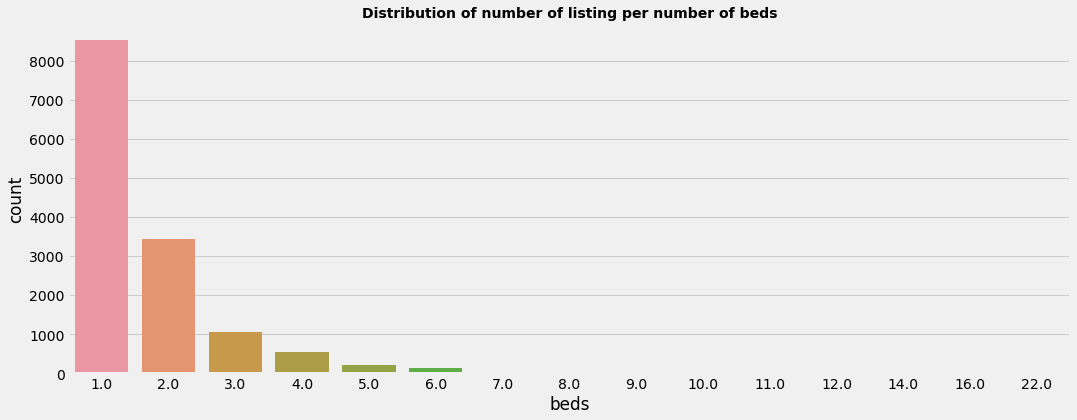

In [37]:
# number of beds

plt.figure(figsize= (16,6))
sns.countplot(x='beds', data= listing_property_t)


plt.title('Distribution of number of listing per number of beds', fontsize= 14, fontweight= 'bold')

<AxesSubplot:xlabel='beds'>

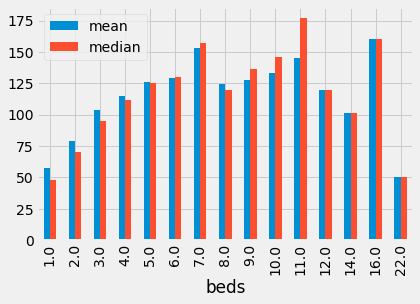

In [38]:
# compare mean and median
plt.style.use("fivethirtyeight")
listing_property_t.groupby('beds').price.agg(['mean','median']).plot(kind= 'bar')

<AxesSubplot:xlabel='beds', ylabel='price'>

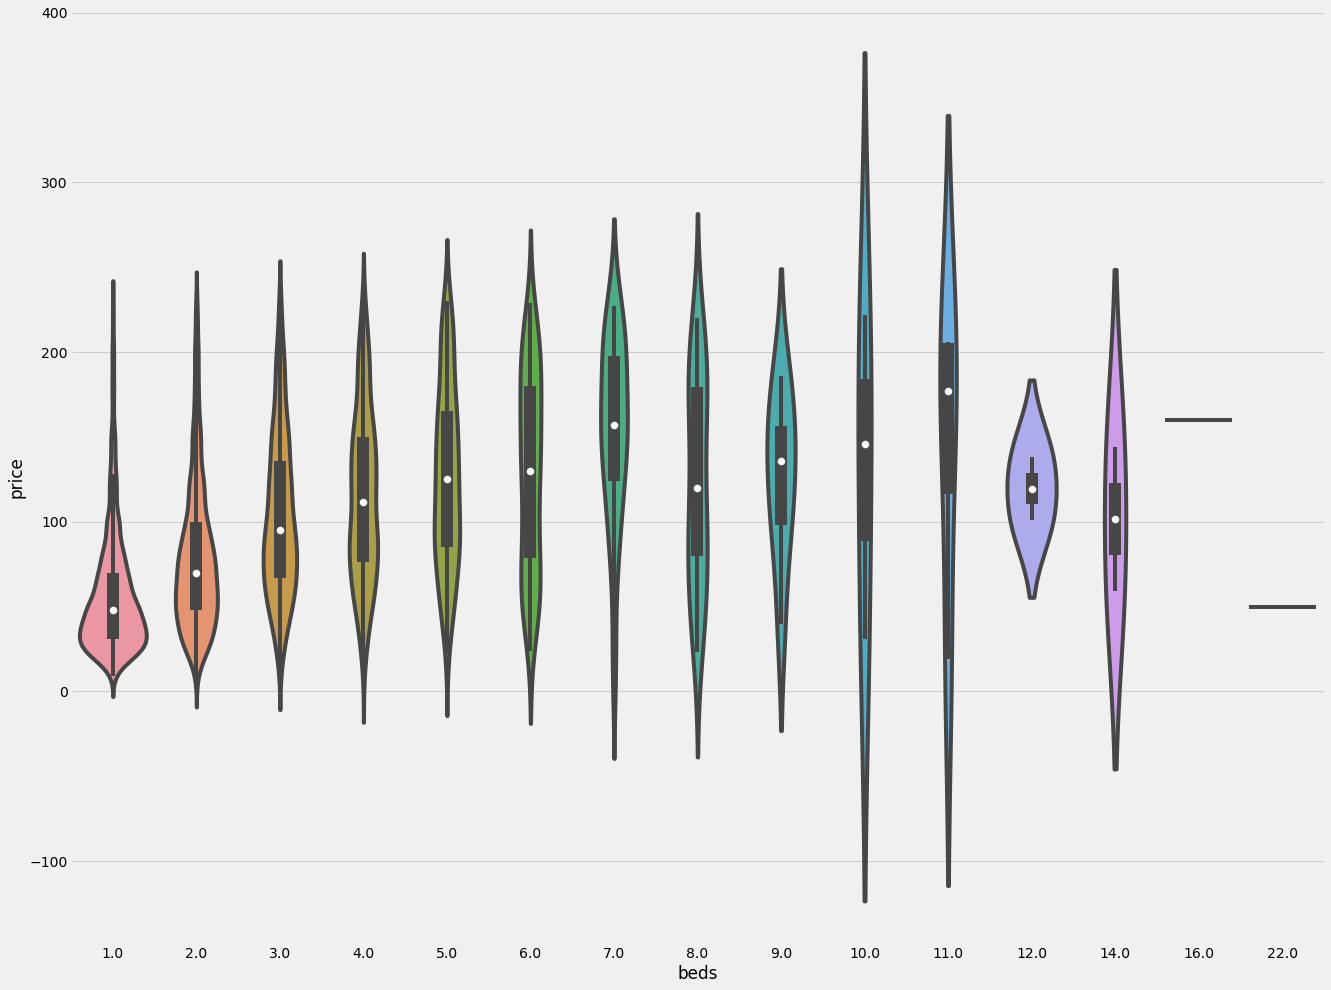

In [41]:
# violin plot - number of beds

plt.figure(figsize= (20,16))
sns.violinplot(data= listing_property_t, x= 'beds', y='price')

In [42]:
# Statistical tests

# pip install researchpy 
import researchpy as rp
import scipy.stats as stats

In [43]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['neighborhood']))

,N,Mean,SD,SE,95% Conf.,Interval
neighborhood,,,,,,
Charlottenburg-Wilm.,1038,73.6156,44.5073,1.3814,70.9049,76.3263
Friedrichshain-Kreuzberg,3176,70.5268,44.1262,0.7830,68.9915,72.0620
Lichtenberg,433,61.8845,40.2984,1.9366,58.0782,65.6909
Marzahn - Hellersdorf,118,72.2797,44.2852,4.0768,64.2058,80.3535
Mitte,2852,78.7816,51.5819,0.9659,76.8877,80.6754
Neukölln,1988,56.8657,35.8726,0.8046,55.2878,58.4435
Pankow,2263,76.9713,45.9638,0.9662,75.0765,78.8660
Reinickendorf,211,59.3412,36.1940,2.4917,54.4293,64.2532
Spandau,135,75.6815,45.5657,3.9217,67.9251,83.4379


In [44]:
# Oneway ANOVA test - neighborhood 

stats.f_oneway(listing_property_t['price'][listing_property_t['neighborhood'] == 'Charlottenburg-Wilm.'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Friedrichshain-Kreuzberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Lichtenberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Marzahn - Hellersdorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Mitte'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Neukölln'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Pankow'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Reinickendorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Spandau'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Steglitz - Zehlendorf'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Tempelhof - Schöneberg'],
               listing_property_t['price'][listing_property_t['neighborhood'] == 'Treptow - Köpenick'])
               

F_onewayResult(statistic=33.67663463294383, pvalue=1.1265528300405003e-71)

In [45]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['room_type']))

,N,Mean,SD,SE,95% Conf.,Interval
room_type,,,,,,
Entire home/apt,7864,90.0286,44.5895,0.5028,89.0430,91.0143
Hotel room,54,158.9259,43.0900,5.8638,147.1646,170.6872
Private room,5912,45.4317,30.2495,0.3934,44.6604,46.2029
Shared room,175,50.3371,44.3542,3.3529,43.7196,56.9547


In [46]:

# Oneway ANOVA test - room_type


stats.f_oneway(listing_property_t['price'][listing_property_t['room_type'] == 'Entire home/apt'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Hotel room'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Private room'],
               listing_property_t['price'][listing_property_t['room_type'] == 'Shared room'])

F_onewayResult(statistic=1565.1349578652002, pvalue=0.0)

In [47]:
rp.summary_cont(listing_property_t['price'].groupby(listing_property_t['share_bath']))

,N,Mean,SD,SE,95% Conf.,Interval
share_bath,,,,,,
0,10077,82.1330,46.6325,0.4645,81.2224,83.0436
1,3928,42.3406,24.2065,0.3862,41.5834,43.0979


In [48]:
# Oneway ANOVA test - share_bath

stats.f_oneway(listing_property_t['price'][listing_property_t['share_bath'] == "0"],
                listing_property_t['price'][listing_property_t['share_bath'] == "1"])

F_onewayResult(statistic=2588.2481655689808, pvalue=0.0)

In [49]:
rp.summary_cont(top_10_property['price'].groupby(top_10_property['property_type']))

,N,Mean,SD,SE,95% Conf.,Interval
property_type,,,,,,
Entire condo,535,104.1551,46.8212,2.0243,100.1787,108.1316
Entire home,152,107.7632,48.1841,3.9082,100.0413,115.4851
Entire loft,228,118.4079,48.9573,3.2423,112.0191,124.7967
Entire rental unit,6558,85.7522,42.1166,0.5201,84.7327,86.7717
Entire serviced apartment,150,148.4533,51.6428,4.2166,140.1212,156.7854
Private room in condo,210,48.8095,28.0117,1.9330,44.9989,52.6202
Private room in home,195,42.9231,20.6797,1.4809,40.0023,45.8438
Private room in rental unit,5058,41.0140,22.5844,0.3176,40.3915,41.6366
Room in hotel,117,132.4103,52.0010,4.8075,122.8884,141.9321


In [50]:
# Oneway ANOVA test - property_type

stats.f_oneway(top_10_property['price'][top_10_property['property_type'] == "Entire condo"],
                top_10_property['price'][top_10_property['property_type'] == "Entire home"],
                top_10_property['price'][top_10_property['property_type'] == "Entire loft"],
                top_10_property['price'][top_10_property['property_type'] == "Entire rental unit"],
                top_10_property['price'][top_10_property['property_type'] == "Entire serviced apartment"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in condo"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in home"],
                top_10_property['price'][top_10_property['property_type'] == "Private room in rental unit"],
                top_10_property['price'][top_10_property['property_type'] == "Room in hotel"],
                top_10_property['price'][top_10_property['property_type'] == "Shared room in rental unit"])

F_onewayResult(statistic=762.8222186065557, pvalue=0.0)

In [51]:
listing_property_t[['accommodates','bedrooms','price','beds']].corr(method= 'pearson')

,accommodates,bedrooms,price,beds
accommodates,1.000000,0.674567,0.527939,0.764675
bedrooms,0.674567,1.000000,0.410229,0.627055
price,0.527939,0.410229,1.000000,0.412421
beds,0.764675,0.627055,0.412421,1.000000


In [52]:
%store listing_property_t

Stored 'listing_property_t' (DataFrame)


### Summary of the analysis: what are the factors of airbnb rent price in Berlin in terms of property features

_Available property features: neighborhood, type of property, type of room, type of bathroom(shared vs. private), number of accommodates, number of bedrooms, number of beds_

+ 95% of the listing are priced under **230 euros** per night. Listings with an extreme price (more than 230 euros per night) are eliminated from this analysis. 
+ The median rent price in Berlin is **60 euros** per night. (min: 8 euros, max: 4060 euros)

#### Neighborhood 
+ **Friedrichshain - Kreuzberg** has the highest number of listings, followed by **Mitte** and **Pankow**. **Marzahn - Hellersdorf** has the least number of listings. 
+ **Mitte** and **Pankow** have the highest median rent price at 65 euros per night, followed by **Marzahn - Hellersdorf** at 64,5 euros per night. 
+ here's a significant difference of rent price between neighborhoods. 

#### Property Types

+ 10 property types account for 95% of the listing. Top three property types are **Entire rental unit, Private room in rental unit and Entire condo**. The uncommon types are **boat, tiny home, castle, entire villa, floor and tent etc..We will focus on top 10 property types for the analysis.
+ **Entire serviced apartment** has the highest median rent price at 145 euros per night, followed by **room in hotel** at 130 euros per night, **entire loft** at 109.5 euros per night, **entire home** at 96 euros and then **entire condo** at 95 euros.
+ There's a significant difference of rent price between property types. 

#### Room Types

+ Most common room types are **entire home or apartment** and **private room**.  
+ **Hotel room** has the highest median rent price at 160 euros per night, followed by **entire home or apartment** at 80 euros per night. 
+ There's a significant difference of rent price between room types. 

#### Bathroom types

+ 72% of the listings have a private bathroom. These have a higher median rent price at 70 euors per night. On the other hand, the median rent price of listings with a shared bath is 36 euros. 
+ There's a significant difference of rent price between bathroom types.

#### Accommodates, Bedrooms & Beds 

+ A weak correlation found between price and number of accommodates (0.52) 
+ A weak correlation found between price and number of bedrooms (0.41) 
+ A weak correlation found between price and number of beds (0.41) 

  